In [1]:
# Connecting to google drive
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/Colab Notebooks/Scraping'


Mounted at /content/drive


In [4]:
import tensorflow as tf
from tensorflow import keras

vgg=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Scraping/vgg_layer.h5')
top=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Scraping/top_layer.h5')

In [28]:
def predict(image=None,url=None):
  # Creating a dictionary for labels
  dict={0:'Cat',1:'Pikachu',2:'Kanye West'}

  if url!=None:
    import cv2
    import matplotlib.pyplot as plt
    import numpy as np

    cap=cv2.VideoCapture(url)
    ret,frame=cap.read()
    im=cv2.resize(frame,(250,250))
    image=np.expand_dims(np.array(im),axis=0)
    embedding=vgg.predict(image)
    embedding=np.array(embedding)
    im=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(im)
    plt.title(dict[np.argmax(top.predict(embedding))],fontsize=15)
    plt.axis('off')



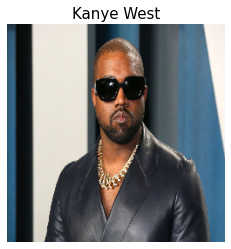

In [33]:
url='https://www.nydailynews.com/resizer/nAxSS1wjUMX5fPA9sDYKQtew0r0=/1200x900/top/cloudfront-us-east-1.images.arcpublishing.com/tronc/PSY4DCWGQJC4XJGSGIRUVRU4SM.jpg'
predict(url=url)

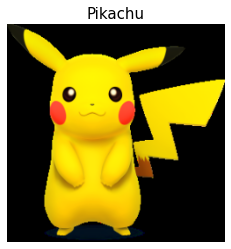

In [32]:
url='https://www.serebii.net/smashbros3dswiiu/characters/pikachu.png'
predict(url=url)

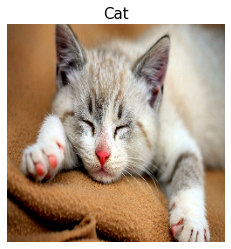

In [34]:
url='https://ukmadcat.com/wp-content/uploads/2019/04/sleepy-cat.jpg'
predict(url=url)